### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

🔍 Basic Statistics:
        patient_id         age gender diagnosis  blood_pressure  cholesterol
count     6.000000    5.000000      6         6        5.000000     6.000000
unique         NaN         NaN      2         3             NaN          NaN
top            NaN         NaN      M         A             NaN          NaN
freq           NaN         NaN      3         2             NaN          NaN
mean      3.500000   56.600000    NaN       NaN      139.000000   237.500000
std       1.870829   52.747512    NaN       NaN       24.083189    80.234033
min       1.000000   25.000000    NaN       NaN      120.000000   190.000000
25%       2.250000   29.000000    NaN       NaN      125.000000   201.250000
50%       3.500000   34.000000    NaN       NaN      130.000000   207.500000
75%       4.750000   45.000000    NaN       NaN      140.000000   217.500000
max       6.000000  150.000000    NaN       NaN      180.000000   400.000000

❓ Null Values:
patient_id        0
age               1


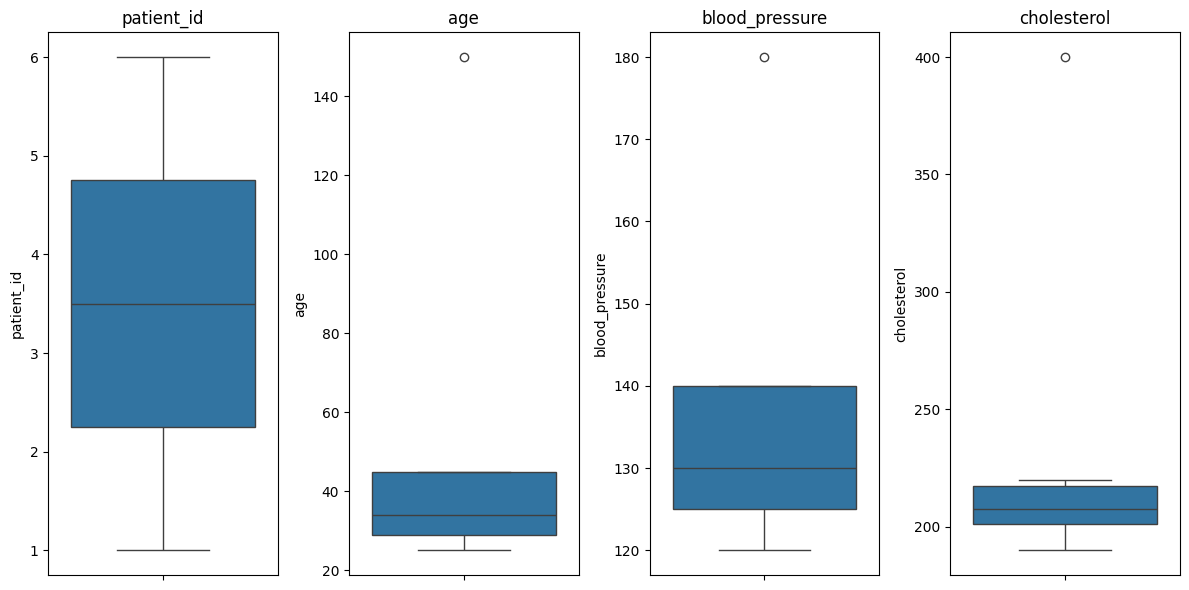

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load/Create Sample Dataset
def load_data():
    data = {
        'patient_id': [1, 2, 3, 4, 5, 6],
        'age': [25, 34, np.nan, 45, 150, 29],  # 150 is an outlier
        'gender': ['M', 'F', 'F', 'M', 'M', 'F'],
        'diagnosis': ['A', 'B', 'A', 'C', 'C', 'B'],
        'blood_pressure': [120, 140, np.nan, 130, 180, 125],
        'cholesterol': [200, 220, 210, 190, 400, 205]  # 400 is a high outlier
    }
    return pd.DataFrame(data)

df = load_data()

# STEP 2: Basic Statistics
print("🔍 Basic Statistics:")
print(df.describe(include='all'))

# STEP 3: Check Null Values
print("\n❓ Null Values:")
print(df.isnull().sum())

# STEP 4: Unique Values for Categorical Columns
print("\n🔑 Unique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# STEP 5: Review Outliers Using Boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

print("\n📦 Displaying box plots for numerical columns (outliers)...")
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [2]:
import pandas as pd
import numpy as np

# Step 1: Sample dataset (replace with actual CSV load if needed)
data = {
    'patient_id': [1, 2, 3, 4, 5],
    'age': [25, 34, None, 150, 40],  # 150 is too high, None is missing
    'gender': ['M', 'F', 'F', 'M', None],  # Missing gender
    'blood_pressure': [120, 140, 130, 110, 'high'],  # 'high' is wrong type
}

df = pd.DataFrame(data)

# Step 2: Define constraints
constraints = {
    'patient_id': {
        'type': int,
        'not_null': True
    },
    'age': {
        'type': float,
        'min': 0,
        'max': 120,
        'not_null': True
    },
    'gender': {
        'type': str,
        'allowed_values': ['M', 'F'],
        'not_null': True
    },
    'blood_pressure': {
        'type': (int, float),
        'min': 80,
        'max': 180,
        'not_null': True
    }
}

# Step 3: Validation logic
def validate(df, constraints):
    errors = []

    for col, rules in constraints.items():
        for idx, val in df[col].items():
            # Not null check
            if rules.get('not_null') and pd.isnull(val):
                errors.append(f"[{col}] Row {idx}: NULL value")
                continue

            # Type check
            if not pd.isnull(val) and not isinstance(val, rules['type']):
                errors.append(f"[{col}] Row {idx}: Invalid type {type(val)}")
                continue

            # Allowed values check
            if 'allowed_values' in rules and val not in rules['allowed_values']:
                errors.append(f"[{col}] Row {idx}: Invalid value '{val}' (allowed: {rules['allowed_values']})")

            # Range checks
            if isinstance(val, (int, float)):
                if 'min' in rules and val < rules['min']:
                    errors.append(f"[{col}] Row {idx}: Value {val} below min {rules['min']}")
                if 'max' in rules and val > rules['max']:
                    errors.append(f"[{col}] Row {idx}: Value {val} above max {rules['max']}")

    return errors

# Step 4: Run validations
validation_errors = validate(df, constraints)

# Step 5: Report
if validation_errors:
    print("❌ Validation Errors Found:")
    for err in validation_errors:
        print(" -", err)
else:
    print("✅ All data passed validation checks.")

❌ Validation Errors Found:
 - [age] Row 2: NULL value
 - [age] Row 3: Value 150.0 above max 120
 - [gender] Row 4: NULL value
 - [blood_pressure] Row 4: Invalid type <class 'str'>


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
🔍 Displaying Missing Data Heatmap...


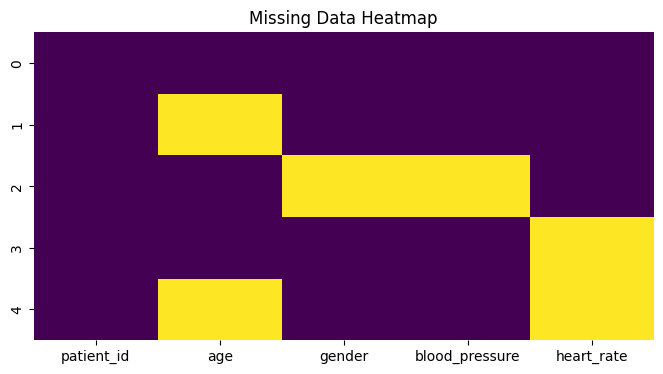

📊 Displaying Missing Data Count Plot...


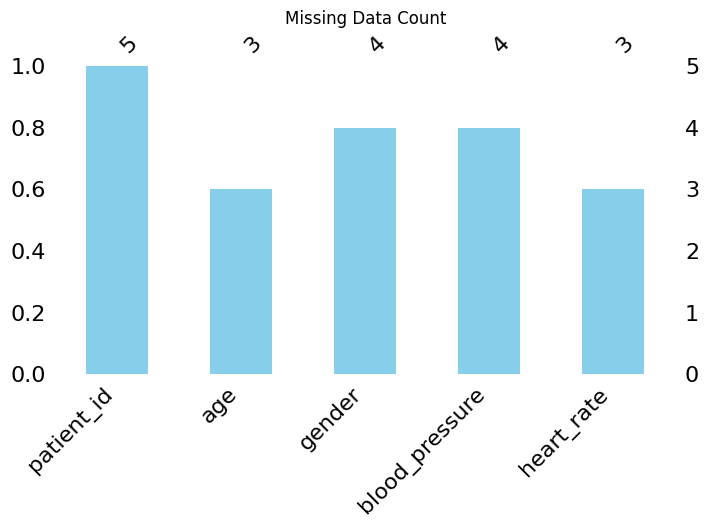

🔗 Displaying Missing Data Matrix...


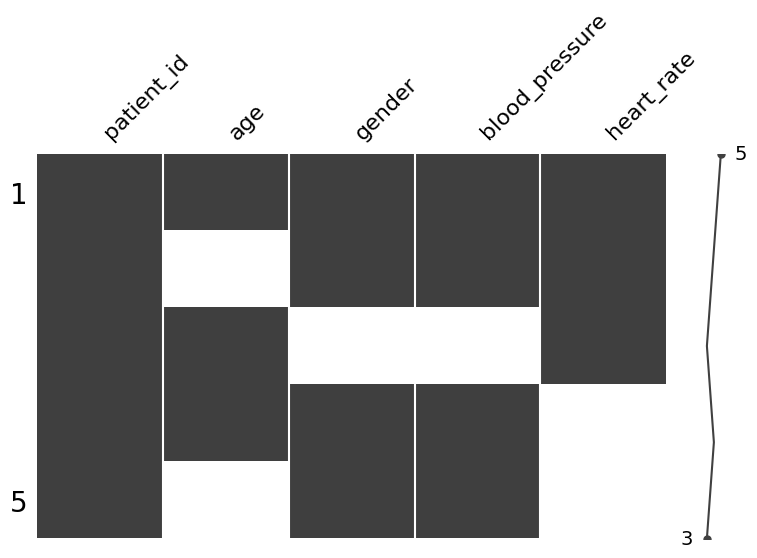

🧩 Displaying Missing Data Correlation Heatmap...


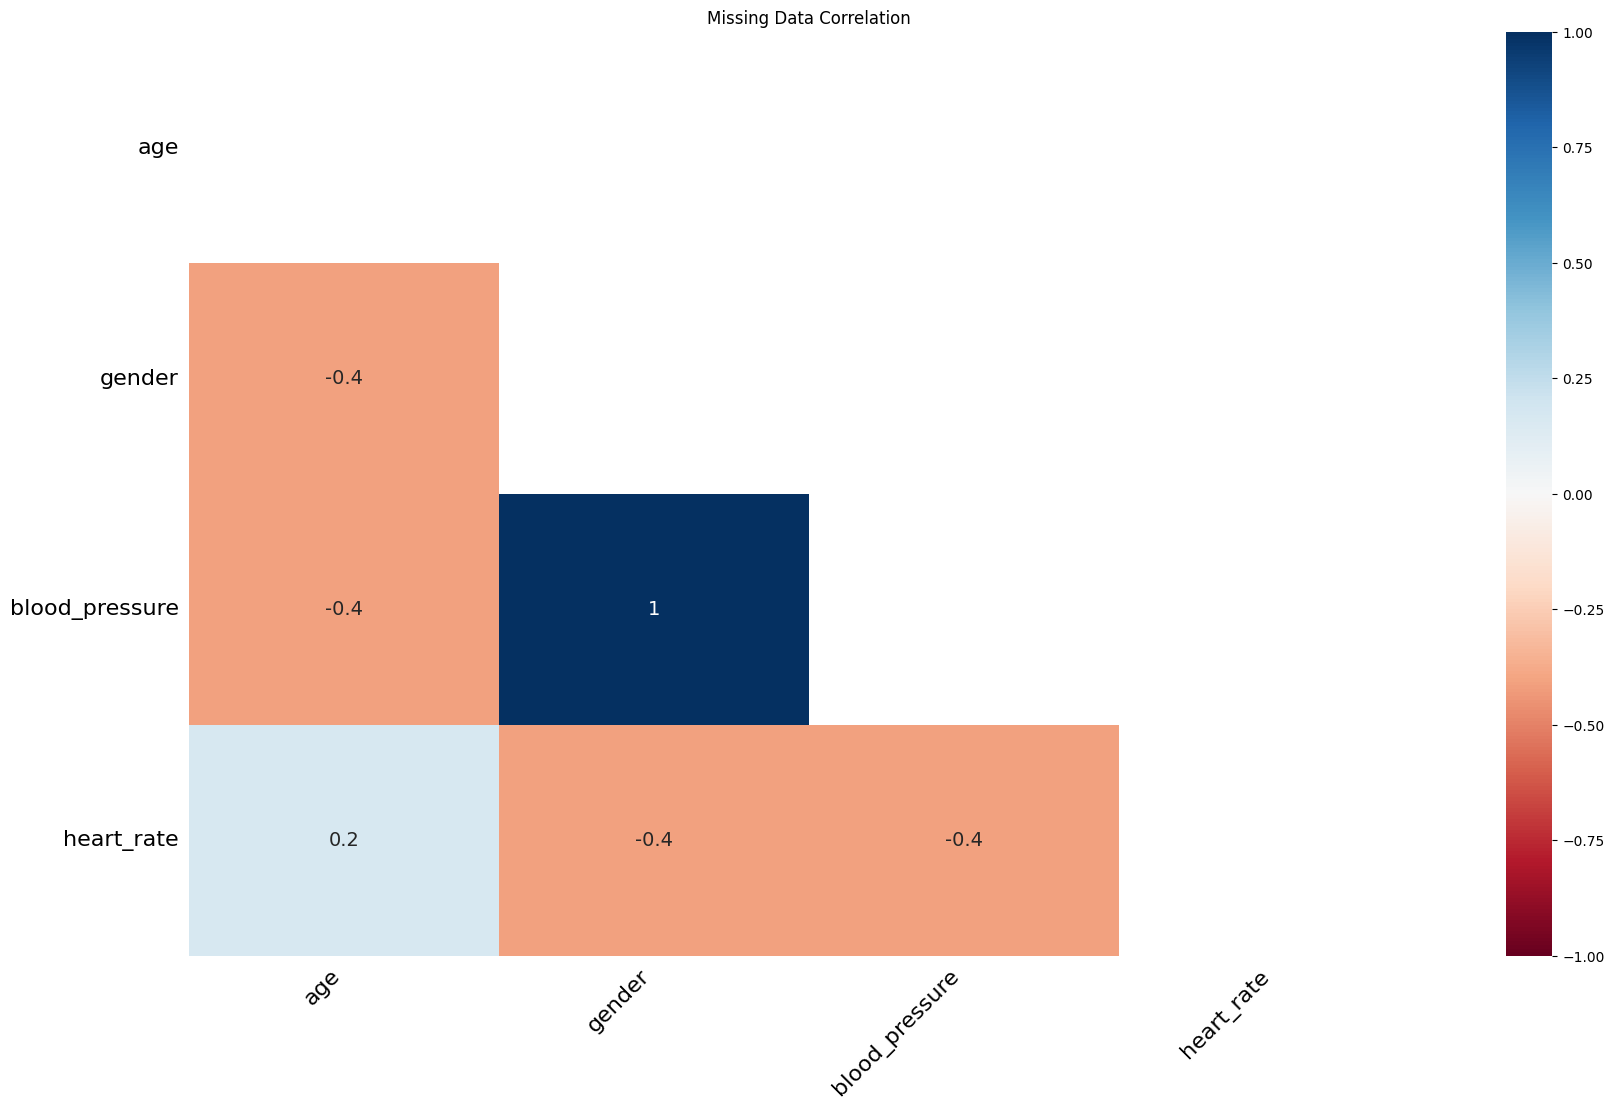


🧾 Summary of Missing Data:
patient_id        0
age               2
gender            1
blood_pressure    1
heart_rate        2
dtype: int64


In [3]:
%pip install pandas matplotlib seaborn missingno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# STEP 1: Load or create a sample dataset
data = {
    'patient_id': [1, 2, 3, 4, 5],
    'age': [25, np.nan, 35, 40, np.nan],
    'gender': ['M', 'F', np.nan, 'M', 'F'],
    'blood_pressure': [120, 130, np.nan, 110, 115],
    'heart_rate': [72, 80, 76, np.nan, np.nan]
}

df = pd.DataFrame(data)

# STEP 2: Visualize missing data using a heatmap
print("🔍 Displaying Missing Data Heatmap...")
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=True)
plt.title("Missing Data Heatmap")
plt.show()

# STEP 3: Missing values bar chart
print("📊 Displaying Missing Data Count Plot...")
msno.bar(df, figsize=(8, 4), color="skyblue")
plt.title("Missing Data Count")
plt.show()

# STEP 4: Matrix plot to see missing data patterns
print("🔗 Displaying Missing Data Matrix...")
msno.matrix(df, figsize=(9, 5))
plt.show()

# STEP 5: Correlation of missingness between columns
print("🧩 Displaying Missing Data Correlation Heatmap...")
msno.heatmap(df)
plt.title("Missing Data Correlation")
plt.show()

# STEP 6: Print missing value counts
print("\n🧾 Summary of Missing Data:")
print(df.isnull().sum())

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [5]:
%pip install pandas great_expectations

import pandas as pd
import great_expectations as gx

# STEP 1: Sample healthcare data
data = {
    "patient_id": [1, 2, 3, 4],
    "age": [25, 40, None, 55],
    "heart_rate": [72, 85, 90, None],
    "gender": ["M", "F", "F", "M"]
}
df = pd.DataFrame(data)

# STEP 2: Initialize Ephemeral GX context
context = gx.get_context(mode="ephemeral")

# STEP 3: Add in-memory pandas DataFrame as DataAsset
datasource = context.sources.add_pandas(name="my_pandas_source")
asset = datasource.add_dataframe_asset(name="healthcare_asset", dataframe=df)
batch_request = asset.build_batch_request()

# STEP 4: Create Expectation Suite
suite = context.suites.add(name="healthcare_suite")

# STEP 5: Get Validator to attach expectations
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite=suite,
)

# STEP 6: Define expectations
validator.expect_column_values_to_not_be_null("patient_id")
validator.expect_column_values_to_be_between("age", min_value=0, max_value=120)
validator.expect_column_values_to_be_in_set("gender", ["M", "F"])
validator.expect_column_values_to_not_be_null("heart_rate")

# STEP 7: Save suite
validator.save_expectation_suite()

# STEP 8: Run a Checkpoint
checkpoint = context.checkpoints.add(
    name="healthcare_checkpoint",
    validations=[
        {
            "batch_request": batch_request,
            "expectation_suite_name": "healthcare_suite"
        }
    ]
)

results = checkpoint.run()

# STEP 9: Print Results
print("\n✅ Validation Summary:")
for r in results.list_validation_results():
    print(r["success"], r["expectation_config"]["expectation_type"])

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


AttributeError: 'EphemeralDataContext' object has no attribute 'sources'